In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

from datetime import datetime
from dateutil.parser import parse

In [2]:
# import lending club data for analysis 
LC_Data = pd.read_csv('appl__accepted_20072019Q3.csv', low_memory=False)

# Data Pre-Processing

In [3]:
#print data head
print(LC_Data.shape)

(2650550, 150)


In [4]:
#print data shape
LC_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#print total column list 
LC_Data.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [8]:
#import data dictionary 
LC_Data_Dictionary = pd.read_csv('LCDataDictionary.csv',encoding= 'unicode_escape')

In [9]:
#print data shape
print(LC_Data_Dictionary.shape)

(153, 2)


In [10]:
LC_Data_Dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [11]:
#show null values
LC_Data_Dictionary.isna().sum()

LoanStatNew    2
Description    1
dtype: int64

In [12]:
#keep column which has less then 50% null value
LC_Data_Dictionary_Update = LC_Data_Dictionary.loc[:, LC_Data_Dictionary.isnull().sum() < 0.5*LC_Data_Dictionary.shape[0]]

In [13]:
#print data shape
print(LC_Data_Dictionary_Update.shape)

(153, 2)


In [14]:
LC_Data_Dictionary_Update.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [15]:
#print number of column name
print(LC_Data_Dictionary_Update.columns.tolist())

['LoanStatNew', 'Description']


In [16]:
#rename data dictionary
LC_Data_Dictionary_Update = LC_Data_Dictionary_Update.rename(columns={'LoanStatNew': 'Variable Name', 'Description': 'Description'})

In [17]:
LC_Data.isna().sum()
#to check the sum of null values in each column

id                             0
member_id                2650550
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2615995
settlement_date          2615995
settlement_amount        2615995
settlement_percentage    2615995
settlement_term          2615995
Length: 150, dtype: int64

In [18]:
LC_Data_Updated = LC_Data.loc[:, LC_Data.isnull().sum() < 0.5*LC_Data.shape[0]]
#Dropping all columns with 50% missing values

In [19]:
print(LC_Data_Updated.shape)

(2650550, 106)


In [20]:
#merge data set with data dictionary with new shape
LC_Data_Explanation = pd.DataFrame(LC_Data_Updated.dtypes,columns=['dtypes'])
LC_Data_Explanation = LC_Data_Explanation.reset_index()
LC_Data_Explanation['Variable Name'] = LC_Data_Explanation['index']
LC_Data_Explanation = LC_Data_Explanation[['Variable Name','dtypes']]
LC_Data_Explanation['first value'] = LC_Data_Updated.loc[0].values
LC_Variables_Explained = LC_Data_Explanation.merge(LC_Data_Dictionary_Update, on='Variable Name',how='left')

In [21]:
#print data shape after marged
LC_Variables_Explained.head()

,Variable Name,dtypes,first value,Description
0,id,object,68407277,A unique LC assigned ID for the loan listing.
1,loan_amnt,float64,3600.0,The listed amount of the loan applied for by t...
2,funded_amnt,float64,3600.0,The total amount committed to that loan at tha...
3,funded_amnt_inv,float64,3600.0,The total amount committed by investors for th...
4,term,object,36 months,The number of payments on the loan. Values are...


In [22]:
#Target Column is loan_status
LC_Data_Updated.loan_status.value_counts()

Current                                                1217855
Fully Paid                                             1111884
Charged Off                                             273973
Late (31-120 days)                                       27067
In Grace Period                                          11386
Late (16-30 days)                                         5558
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     45
Name: loan_status, dtype: int64

In [23]:
# Dropping unrequired components of target variable
LC_Data_Updated = LC_Data_Updated[LC_Data_Updated.loan_status != 'Current']
LC_Data_Updated = LC_Data_Updated[LC_Data_Updated.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
LC_Data_Updated = LC_Data_Updated[LC_Data_Updated.loan_status != 'Does not meet the credit policy. Status:Charged Off']

In [24]:
#print total number of data in different rows of target column
LC_Data_Updated.loan_status.value_counts()

Fully Paid            1111884
Charged Off            273973
Late (31-120 days)      27067
In Grace Period         11386
Late (16-30 days)        5558
Default                    45
Name: loan_status, dtype: int64

In [25]:
#Credit Score Bad (0) for Charged Off, Default, Late (31-120 day), Does not meet the credit policy. Status:Charged Off
#Credit Score Good (1) for others
#Creation of a New Column that will be based on loan_status column which is our target variable
LC_Data_Updated['Credit_Score'] = np.where(LC_Data_Updated.loc[:, 'loan_status'].isin(['Charged Off', 'Default',
                                                                       'Late (31-120 days)','Late (16-30 days)','In Grace Period']), 0, 1)

In [26]:
#value counts after catagorized target variable 
LC_Data_Updated.Credit_Score.value_counts()

1    1111917
0     318029
Name: Credit_Score, dtype: int64

In [27]:
#Dropping the Orgininal loan_status column since we already converted the target function to binary
LC_Data_Updated.drop(columns = ['loan_status'], inplace = True)

In [28]:
#Analyzing Predictive Column
len(LC_Data_Updated.columns)

106

In [29]:
#creation of a list in order to store the columns that will retian as categorical or numerical
#------------------------------------------------------------------------
Categorical_Features=[]
Numerical_Features=[]

In [30]:
#print number of column with different set attributes
LC_Variables_Explained[:15]

,Variable Name,dtypes,first value,Description
0,id,object,68407277,A unique LC assigned ID for the loan listing.
1,loan_amnt,float64,3600.000000,The listed amount of the loan applied for by t...
2,funded_amnt,float64,3600.000000,The total amount committed to that loan at tha...
3,funded_amnt_inv,float64,3600.000000,The total amount committed by investors for th...
4,term,object,36 months,The number of payments on the loan. Values are...
5,int_rate,object,13.99,Interest Rate on the loan
6,installment,float64,123.030000,The monthly payment owed by the borrower if th...
7,grade,object,C,LC assigned loan grade
8,sub_grade,object,C4,LC assigned loan subgrade
9,emp_title,object,leadman,The job title supplied by the Borrower when ap...


In [31]:
#drop unrequired columns
LC_Data_Updated.drop(columns = ['id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','verification_status'], inplace = True)

In [32]:
#add variable respect to numerical and catagorical characteristic 
Categorical_Features.append('term')
Categorical_Features.append('grade')
Categorical_Features.append('home_ownership')
Numerical_Features.append('loan_amnt')
Numerical_Features.append('int_rate')
Numerical_Features.append('installment')
Numerical_Features.append('emp_length')
Numerical_Features.append('annual_inc')

In [33]:
#print number of column with different set attributes 
LC_Variables_Explained[15:30]

,Variable Name,dtypes,first value,Description
15,loan_status,object,Fully Paid,Current status of the loan
16,pymnt_plan,object,n,Indicates if a payment plan has been put in pl...
17,url,object,https://lendingclub.com/browse/loanDetail.acti...,URL for the LC page with listing data.
18,purpose,object,debt_consolidation,A category provided by the borrower for the lo...
19,title,object,Debt consolidation,The loan title provided by the borrower
20,zip_code,object,190xx,The first 3 numbers of the zip code provided b...
21,addr_state,object,PA,The state provided by the borrower in the loan...
22,dti,float64,5.91,A ratio calculated using the borrowers total ...
23,delinq_2yrs,float64,0.00,The number of 30+ days past-due incidences of ...
24,earliest_cr_line,object,Aug-2003,The month the borrower's earliest reported cre...


In [34]:
#add variable respect to numerical and catagorical characteristic 
Categorical_Features.append('purpose')
Numerical_Features.append('dti')
Numerical_Features.append('delinq_2yrs')
Numerical_Features.append('inq_last_6mths')
Numerical_Features.append('open_acc')

In [35]:
#drop unrequired columns
LC_Data_Updated.drop(columns = ['pymnt_plan','url','title','zip_code','addr_state','earliest_cr_line','fico_range_low','fico_range_high','pub_rec'], inplace = True)

In [36]:
#print number of column with different set attributes 
LC_Variables_Explained[30:45]

,Variable Name,dtypes,first value,Description
30,revol_bal,float64,2765.000000,Total credit revolving balance
31,revol_util,object,29.7,"Revolving line utilization rate, or the amount..."
32,total_acc,float64,13.000000,The total number of credit lines currently in ...
33,initial_list_status,object,w,The initial listing status of the loan. Possib...
34,out_prncp,float64,0.000000,Remaining outstanding principal for total amou...
35,out_prncp_inv,float64,0.000000,Remaining outstanding principal for portion of...
36,total_pymnt,float64,4421.723917,Payments received to date for total amount funded
37,total_pymnt_inv,float64,4421.720000,Payments received to date for portion of total...
38,total_rec_prncp,float64,3600.000000,Principal received to date
39,total_rec_int,float64,821.720000,Interest received to date


In [37]:
#drop unrequired columns
LC_Data_Updated.drop(columns = ['initial_list_status','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'], inplace = True)

In [38]:
#add variable respect to numerical and catagorical characteristic 
Numerical_Features.append('revol_bal')
Numerical_Features.append('revol_util')
Numerical_Features.append('total_acc')
Numerical_Features.append('out_prncp')
Numerical_Features.append('total_pymnt')
Numerical_Features.append('recoveries')

In [39]:
LC_Variables_Explained[45:60]

,Variable Name,dtypes,first value,Description
45,last_credit_pull_d,object,Mar-2019,The most recent month LC pulled credit for thi...
46,last_fico_range_high,float64,564.0,The upper boundary range the borrowers last F...
47,last_fico_range_low,float64,560.0,The lower boundary range the borrowers last F...
48,collections_12_mths_ex_med,float64,0.0,Number of collections in 12 months excluding m...
49,policy_code,float64,1.0,publicly available policy_code=1\nnew products...
50,application_type,object,Individual,Indicates whether the loan is an individual ap...
51,acc_now_delinq,float64,0.0,The number of accounts on which the borrower i...
52,tot_coll_amt,float64,722.0,Total collection amounts ever owed
53,tot_cur_bal,float64,144904.0,Total current balance of all accounts
54,open_acc_6m,float64,2.0,Number of open trades in last 6 months


In [40]:
#add variable respect to numerical and catagorical characteristic 
Numerical_Features.append('acc_now_delinq')
Numerical_Features.append('tot_coll_amt')

In [41]:
#drop unrequired columns
LC_Data_Updated.drop(columns = ['last_credit_pull_d','last_fico_range_high','last_fico_range_low','collections_12_mths_ex_med','application_type','tot_cur_bal','open_acc_6m','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','policy_code'], inplace = True)

In [42]:
#print number of column with different set attributes 
LC_Variables_Explained[60:75]

,Variable Name,dtypes,first value,Description
60,il_util,float64,36.0,Ratio of total current balance to high credit/...
61,open_rv_12m,float64,3.0,Number of revolving trades opened in past 12 m...
62,open_rv_24m,float64,3.0,Number of revolving trades opened in past 24 m...
63,max_bal_bc,float64,722.0,Maximum current balance owed on all revolving ...
64,all_util,float64,34.0,Balance to credit limit on all trades
65,total_rev_hi_lim,float64,9300.0,NaN
66,inq_fi,float64,3.0,Number of personal finance inquiries
67,total_cu_tl,float64,1.0,Number of finance trades
68,inq_last_12m,float64,4.0,Number of credit inquiries in past 12 months
69,acc_open_past_24mths,float64,4.0,Number of trades opened in past 24 months.


In [43]:
#add variable respect to numerical and catagorical characteristic 
Numerical_Features.append('delinq_amnt')
Numerical_Features.append('chargeoff_within_12_mths')

In [44]:
#drop unrequired columns
LC_Data_Updated.drop(columns = ['il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util'], inplace = True)

In [45]:
#print number of column with different set attributes 
LC_Variables_Explained[75:90]

,Variable Name,dtypes,first value,Description
75,mo_sin_old_il_acct,float64,148.0,Months since oldest bank installment account o...
76,mo_sin_old_rev_tl_op,float64,128.0,Months since oldest revolving account opened
77,mo_sin_rcnt_rev_tl_op,float64,3.0,Months since most recent revolving account opened
78,mo_sin_rcnt_tl,float64,3.0,Months since most recent account opened
79,mort_acc,float64,1.0,Number of mortgage accounts.
80,mths_since_recent_bc,float64,4.0,Months since most recent bankcard account opened.
81,mths_since_recent_inq,float64,4.0,Months since most recent inquiry.
82,num_accts_ever_120_pd,float64,2.0,Number of accounts ever 120 or more days past due
83,num_actv_bc_tl,float64,2.0,Number of currently active bankcard accounts
84,num_actv_rev_tl,float64,4.0,Number of currently active revolving trades


In [46]:
#drop unrequired columns
LC_Data_Updated.drop(columns = ['mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts'], inplace = True)

In [47]:
#add variable respect to numerical and catagorical characteristic
Numerical_Features.append('num_accts_ever_120_pd')
Numerical_Features.append('mort_acc')
Numerical_Features.append('mths_since_recent_inq')

In [48]:
#add variable respect to numerical and catagorical characteristic
Numerical_Features.append('mths_since_recent_bc')

In [49]:
#add variable respect to numerical and catagorical characteristic
Numerical_Features.append('num_actv_bc_tl')

In [50]:
#print number of column with different set attributes 
LC_Variables_Explained[90:108]

,Variable Name,dtypes,first value,Description
90,num_rev_tl_bal_gt_0,float64,4.0,Number of revolving trades with balance >0
91,num_sats,float64,7.0,Number of satisfactory accounts
92,num_tl_120dpd_2m,float64,0.0,Number of accounts currently 120 days past due...
93,num_tl_30dpd,float64,0.0,Number of accounts currently 30 days past due ...
94,num_tl_90g_dpd_24m,float64,0.0,Number of accounts 90 or more days past due in...
95,num_tl_op_past_12m,float64,3.0,Number of accounts opened in past 12 months
96,pct_tl_nvr_dlq,float64,76.9,Percent of trades never delinquent
97,percent_bc_gt_75,float64,0.0,Percentage of all bankcard accounts > 75% of l...
98,pub_rec_bankruptcies,float64,0.0,Number of public record bankruptcies
99,tax_liens,float64,0.0,Number of tax liens


In [51]:
#drop unrequired columns
LC_Data_Updated.drop(columns = ['num_rev_tl_bal_gt_0','num_sats','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','hardship_flag','debt_settlement_flag'], inplace = True)

In [52]:
#add variable respect to numerical and catagorical characteristic 
Numerical_Features.append('num_tl_30dpd')
Numerical_Features.append('num_tl_90g_dpd_24m')
Numerical_Features.append('tax_liens')
Numerical_Features.append('num_tl_120dpd_2m')
Numerical_Features.append('pub_rec_bankruptcies')

In [53]:
#print data shape after chosing variable related to our analysis
print(LC_Data_Updated.shape)

(1429946, 35)


In [54]:
#print null values
LC_Data_Updated.isna().sum()

loan_amnt                       33
term                            33
int_rate                        33
installment                     33
grade                           33
emp_length                   86300
home_ownership                  33
annual_inc                      33
issue_d                         33
purpose                         33
dti                            577
delinq_2yrs                     33
inq_last_6mths                  34
open_acc                        33
revol_bal                       33
revol_util                    1015
total_acc                       33
out_prncp                       33
total_pymnt                     33
recoveries                      33
acc_now_delinq                  33
tot_coll_amt                 67560
chargeoff_within_12_mths        89
delinq_amnt                     33
mort_acc                     47314
mths_since_recent_bc         61461
mths_since_recent_inq       181169
num_accts_ever_120_pd        67560
num_actv_bc_tl      

In [55]:
#drop null rows for columns with the maximum number of null values first
LC_Data_Updated.dropna(subset=['mths_since_recent_inq','num_tl_120dpd_2m'],inplace=True)

In [56]:
LC_Data_Updated.isna().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_length                  71019
home_ownership                  0
annual_inc                      0
issue_d                         0
purpose                         0
dti                           456
delinq_2yrs                     0
inq_last_6mths                  1
open_acc                        0
revol_bal                       0
revol_util                    695
total_acc                       0
out_prncp                       0
total_pymnt                     0
recoveries                      0
acc_now_delinq                  0
tot_coll_amt                    0
chargeoff_within_12_mths        0
delinq_amnt                     0
mort_acc                        0
mths_since_recent_bc        11919
mths_since_recent_inq           0
num_accts_ever_120_pd           0
num_actv_bc_tl                  0
num_tl_120dpd_

In [57]:
#drop null rows
LC_Data_Updated.dropna(subset=['emp_length'],inplace=True)

In [58]:
LC_Data_Updated.isna().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_length                      0
home_ownership                  0
annual_inc                      0
issue_d                         0
purpose                         0
dti                            29
delinq_2yrs                     0
inq_last_6mths                  1
open_acc                        0
revol_bal                       0
revol_util                    656
total_acc                       0
out_prncp                       0
total_pymnt                     0
recoveries                      0
acc_now_delinq                  0
tot_coll_amt                    0
chargeoff_within_12_mths        0
delinq_amnt                     0
mort_acc                        0
mths_since_recent_bc        10829
mths_since_recent_inq           0
num_accts_ever_120_pd           0
num_actv_bc_tl                  0
num_tl_120dpd_

In [59]:
#drop null rows
LC_Data_Updated.dropna(subset=['mths_since_recent_bc'],inplace=True)

In [60]:
LC_Data_Updated.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
purpose                       0
dti                          28
delinq_2yrs                   0
inq_last_6mths                1
open_acc                      0
revol_bal                     0
revol_util                  147
total_acc                     0
out_prncp                     0
total_pymnt                   0
recoveries                    0
acc_now_delinq                0
tot_coll_amt                  0
chargeoff_within_12_mths      0
delinq_amnt                   0
mort_acc                      0
mths_since_recent_bc          0
mths_since_recent_inq         0
num_accts_ever_120_pd         0
num_actv_bc_tl                0
num_tl_120dpd_2m              0
num_tl_30dpd                  0
num_tl_9

In [61]:
#drop null rows
LC_Data_Updated.dropna(subset=['revol_util','dti','inq_last_6mths'],inplace=True)

In [62]:
LC_Data_Updated.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
emp_length                  0
home_ownership              0
annual_inc                  0
issue_d                     0
purpose                     0
dti                         0
delinq_2yrs                 0
inq_last_6mths              0
open_acc                    0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
total_pymnt                 0
recoveries                  0
acc_now_delinq              0
tot_coll_amt                0
chargeoff_within_12_mths    0
delinq_amnt                 0
mort_acc                    0
mths_since_recent_bc        0
mths_since_recent_inq       0
num_accts_ever_120_pd       0
num_actv_bc_tl              0
num_tl_120dpd_2m            0
num_tl_30dpd                0
num_tl_90g_dpd_24m          0
pub_rec_bankruptcies        0
tax_liens 

In [63]:
print(LC_Data_Updated.shape)

(1097024, 35)


In [64]:
#reset dataset
LC_Data_Updated.reset_index(inplace=True)

In [65]:
LC_Data_Updated = LC_Data_Updated.loc[:,LC_Data_Updated.apply(pd.Series.nunique) != 1]
#Columns with one unique value

In [66]:
for col in LC_Data_Updated.columns:
    if (len(LC_Data_Updated[col].unique()) < 10):
        print(LC_Data_Updated[col].value_counts())
        print()
#Use to check whether any variable has binary rows and if one of the rows has less than 10% we drop that column

 36 months    814304
 60 months    282720
Name: term, dtype: int64

C    319023
B    313003
A    181260
D    171021
E     77949
F     26798
G      7970
Name: grade, dtype: int64

MORTGAGE    558799
RENT        423967
OWN         113580
ANY            608
OTHER           37
NONE            33
Name: home_ownership, dtype: int64

0.0    595167
1.0    330110
2.0    116226
3.0     40839
4.0     10537
5.0      3482
6.0       659
7.0         3
8.0         1
Name: inq_last_6mths, dtype: int64

0.0     1091711
1.0        5009
2.0         252
3.0          39
4.0           8
5.0           3
14.0          1
6.0           1
Name: acc_now_delinq, dtype: int64

0.0    1096219
1.0        768
2.0         31
3.0          4
4.0          1
6.0          1
Name: num_tl_120dpd_2m, dtype: int64

0.0    1093553
1.0       3289
2.0        152
3.0         24
4.0          6
Name: num_tl_30dpd, dtype: int64

1    852301
0    244723
Name: Credit_Score, dtype: int64



In [67]:
#Data Frame for Categorical Data
#-----------------------------------------------------------------------------------------------------------------------------
Categorical_Data=pd.DataFrame()
for col in Categorical_Features:
    Categorical_Data=pd.concat([ Categorical_Data, LC_Data_Updated[col]], axis= 1)

Categorical_Data.head()

,term,grade,home_ownership,purpose
0,36 months,C,MORTGAGE,debt_consolidation
1,36 months,C,MORTGAGE,small_business
2,60 months,B,MORTGAGE,home_improvement
3,60 months,F,MORTGAGE,major_purchase
4,36 months,B,MORTGAGE,debt_consolidation


In [68]:
#Data Frame for Numerical Data
#-----------------------------------------------------------------------------------------------------------------------------
Numerical_Data=pd.DataFrame()
for col in Numerical_Features:
    Numerical_Data=pd.concat([ Numerical_Data, LC_Data_Updated[col]], axis= 1)

Numerical_Data.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,num_accts_ever_120_pd,mort_acc,mths_since_recent_inq,mths_since_recent_bc,num_actv_bc_tl,num_tl_30dpd,num_tl_90g_dpd_24m,tax_liens,num_tl_120dpd_2m,pub_rec_bankruptcies
0,3600.0,13.99,123.03,10+ years,55000.0,5.91,0.0,1.0,7.0,2765.0,...,2.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
1,24700.0,11.99,820.28,10+ years,65000.0,16.06,1.0,4.0,22.0,21470.0,...,0.0,4.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
2,20000.0,10.78,432.66,10+ years,63000.0,10.78,0.0,0.0,6.0,7869.0,...,0.0,5.0,10.0,101.0,2.0,0.0,0.0,0.0,0.0,0.0
3,10400.0,22.45,289.91,3 years,104433.0,25.37,1.0,3.0,12.0,21929.0,...,0.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
4,20000.0,9.17,637.58,10+ years,180000.0,14.67,0.0,0.0,12.0,87329.0,...,0.0,4.0,10.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0


In [69]:
Numerical_Data.emp_length.unique()

array(['10+ years', '3 years', '6 years', '7 years', '8 years', '2 years',
       '5 years', '9 years', '< 1 year', '4 years', '1 year'],
      dtype=object)

In [70]:
#Converting emp_length from Int Values
mapping_dict = {
    'emp_length': {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
    }
}

Numerical_Data.replace(mapping_dict, inplace=True)

In [71]:
Numerical_Data.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,num_accts_ever_120_pd,mort_acc,mths_since_recent_inq,mths_since_recent_bc,num_actv_bc_tl,num_tl_30dpd,num_tl_90g_dpd_24m,tax_liens,num_tl_120dpd_2m,pub_rec_bankruptcies
0,3600.0,13.99,123.03,10,55000.0,5.91,0.0,1.0,7.0,2765.0,...,2.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
1,24700.0,11.99,820.28,10,65000.0,16.06,1.0,4.0,22.0,21470.0,...,0.0,4.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
2,20000.0,10.78,432.66,10,63000.0,10.78,0.0,0.0,6.0,7869.0,...,0.0,5.0,10.0,101.0,2.0,0.0,0.0,0.0,0.0,0.0
3,10400.0,22.45,289.91,3,104433.0,25.37,1.0,3.0,12.0,21929.0,...,0.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
4,20000.0,9.17,637.58,10,180000.0,14.67,0.0,0.0,12.0,87329.0,...,0.0,4.0,10.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#print numerical data info
Numerical_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097024 entries, 0 to 1097023
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   loan_amnt                 1097024 non-null  float64
 1   int_rate                  1097024 non-null  object 
 2   installment               1097024 non-null  float64
 3   emp_length                1097024 non-null  int64  
 4   annual_inc                1097024 non-null  float64
 5   dti                       1097024 non-null  float64
 6   delinq_2yrs               1097024 non-null  float64
 7   inq_last_6mths            1097024 non-null  float64
 8   open_acc                  1097024 non-null  float64
 9   revol_bal                 1097024 non-null  float64
 10  revol_util                1097024 non-null  object 
 11  total_acc                 1097024 non-null  float64
 12  out_prncp                 1097024 non-null  float64
 13  total_pymnt               109702

In [73]:
#print numerical data column
Numerical_Data.columns.tolist()

['loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'recoveries',
 'acc_now_delinq',
 'tot_coll_amt',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'num_accts_ever_120_pd',
 'mort_acc',
 'mths_since_recent_inq',
 'mths_since_recent_bc',
 'num_actv_bc_tl',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'tax_liens',
 'num_tl_120dpd_2m',
 'pub_rec_bankruptcies']

In [74]:
#print int rate
Numerical_Data.int_rate.unique()

array(['13.99', '11.99', '10.78', '22.45', '9.17', '8.49', '6.49',
       '11.48', '12.88', '19.48', '7.49', '14.85', '13.44', '5.32',
       '17.97', '24.24', '15.77', '9.8', '17.27', '18.49', '7.91',
       '23.13', '19.89', '20.5', '16.59', '26.06', '21.48', '6.99',
       '27.49', '26.99', '18.99', '27.99', '28.49', '6.0', '25.09',
       '28.99', '7.89', '13.67', '10.64', '7.26', '14.48', '16.55',
       '17.86', '13.18', '6.24', '8.38', '15.41', '21.99', '9.76',
       '16.99', '25.99', '12.59', '17.57', '18.2', '22.99', '6.89',
       '11.22', '19.99', '27.31', '20.99', '27.88', '23.99', '24.99',
       '26.77', '12.05', '8.18', '9.99', '10.99', '14.33', '11.49',
       '16.9', '18.55', '14.65', '13.33', '12.69', '11.53', '18.25',
       '19.19', '12.29', '15.61', '25.78', '19.52', '24.5', '5.93',
       '6.39', '6.92', '20.49', '21.67', '25.8', '18.84', '6.68', '25.57',
       '25.83', '25.89', '8.67', '14.99', '17.14', '8.19', '11.44',
       '12.39', '15.59', '9.49', '13.66',

In [75]:
#print revol uti
Numerical_Data.revol_util.unique()

array(['29.7', '19.2', '56.2', ..., '102.80%', '107%', '102.20%'],
      dtype=object)

In [76]:
#replace % into float
Numerical_Data['int_rate']=Numerical_Data['int_rate'].str.strip('%').astype(float)

In [77]:
#replace % into float
Numerical_Data['revol_util']=Numerical_Data['revol_util'].str.strip('%').astype(float)

In [78]:
#covert all into float data
for col in Numerical_Data.columns:
    Numerical_Data[col].astype(float)

In [79]:
#print data description
Numerical_Data.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,num_accts_ever_120_pd,mort_acc,mths_since_recent_inq,mths_since_recent_bc,num_actv_bc_tl,num_tl_30dpd,num_tl_90g_dpd_24m,tax_liens,num_tl_120dpd_2m,pub_rec_bankruptcies
count,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,...,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06
mean,1.485299e+04,1.347440e+01,4.502924e+02,5.959306e+00,7.939301e+04,1.848720e+01,3.239327e-01,6.824099e-01,1.205856e+01,1.619094e+04,...,5.426536e-01,1.689762e+00,6.788445e+00,2.247141e+01,3.667173e+00,3.362734e-03,8.249592e-02,5.420210e-02,7.766466e-04,1.360636e-01
std,8.854405e+03,4.864469e+00,2.652743e+02,3.697383e+00,7.553713e+04,1.000293e+01,8.840564e-01,9.213644e-01,5.572696e+00,2.173823e+04,...,1.378365e+00,1.996852e+00,5.863871e+00,2.902888e+01,2.208406e+00,6.185014e-02,4.814601e-01,4.150410e-01,2.987848e-02,3.829741e-01
min,1.000000e+03,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.930000e+00,2.576600e+02,2.000000e+00,4.900000e+04,1.203000e+01,0.000000e+00,0.000000e+00,8.000000e+00,6.050000e+03,...,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.280000e+04,1.299000e+01,3.854100e+02,6.000000e+00,6.700000e+04,1.782000e+01,0.000000e+00,0.000000e+00,1.100000e+01,1.124100e+04,...,0.000000e+00,1.000000e+00,5.000000e+00,1.300000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+04,1.629000e+01,5.977700e+02,1.000000e+01,9.500000e+04,2.430000e+01,0.000000e+00,1.000000e+00,1.500000e+01,1.983100e+04,...,0.000000e+00,3.000000e+00,1.000000e+01,2.600000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.000000e+01,1.099920e+07,9.990000e+02,3.900000e+01,8.000000e+00,9.000000e+01,2.568995e+06,...,5.100000e+01,4.700000e+01,2.400000e+01,6.040000e+02,5.000000e+01,4.000000e+00,3.900000e+01,8.500000e+01,6.000000e+00,1.200000e+01


In [80]:
#print data categorical data info 
Categorical_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097024 entries, 0 to 1097023
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   term            1097024 non-null  object
 1   grade           1097024 non-null  object
 2   home_ownership  1097024 non-null  object
 3   purpose         1097024 non-null  object
dtypes: object(4)
memory usage: 41.8+ MB


In [81]:
for col in Categorical_Data.columns:
    print(col,'\n'*2,Categorical_Data[col].unique(),'\n'*3)
#Converting Ordinal Value(Categorical Data)

term 

 [' 36 months' ' 60 months'] 



grade 

 ['C' 'B' 'F' 'A' 'E' 'D' 'G'] 



home_ownership 

 ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER'] 



purpose 

 ['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'car' 'medical' 'vacation' 'moving'
 'renewable_energy' 'wedding' 'educational'] 





In [82]:
#Dummy Variables
#------------------------------------------------------------------------------------------------------------------------------
for col in Categorical_Data.columns:
    Dummy_Variables = pd.get_dummies(Categorical_Data[col])
    Dummy_Variables.drop(Dummy_Variables.columns[-1],axis=1,inplace=True)# dropping one of each to reduce multicoloniearity
    Categorical_Data = pd.concat([Categorical_Data, Dummy_Variables], axis=1)
    Categorical_Data.drop(col, axis=1, inplace=True)

In [83]:
Categorical_Data.head()

,36 months,A,B,C,D,E,F,ANY,MORTGAGE,NONE,...,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#covert into int
for col in Categorical_Data.columns:
    Categorical_Data[col].astype(int)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
#Scale numerical dataset
Scaler = StandardScaler()
Scaled_Numerical_Data = pd.DataFrame(Scaler.fit_transform(Numerical_Data),columns=Numerical_Data.columns)

In [87]:
#Merging Numerical and Categorical Data
Independent_Variable=pd.concat([Scaled_Numerical_Data,Categorical_Data],axis=1)
#------------------------------------------------------------------------------------------------------------------------------
Target_Variable=LC_Data_Updated.Credit_Score
print(Independent_Variable.shape, Target_Variable.shape)
Independent_Variable.head()

(1097024, 54) (1097024,)


,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,-1.270892,0.105993,-1.233676,1.092853,-0.322928,-1.257352,-0.366417,0.344696,-0.907741,-0.617619,...,0,0,0,0,0,0,0,0,0,0
1,1.112104,-0.305152,1.394736,1.092853,-0.190542,-0.242649,0.764734,3.600738,1.783956,0.242847,...,0,0,0,0,0,0,0,0,1,0
2,0.581294,-0.553895,-0.066469,1.092853,-0.217019,-0.770494,-0.366417,-0.740652,-1.087188,-0.382825,...,0,1,0,0,0,0,0,0,0,0
3,-0.502912,1.845135,-0.604591,-0.800379,0.331493,0.688079,0.764734,2.515391,-0.010509,0.263962,...,0,0,0,1,0,0,0,0,0,0
4,0.581294,-0.884866,0.706015,1.092853,1.331889,-0.381608,-0.366417,-0.740652,-0.010509,3.272488,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

In [93]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [187]:
#data ranking based on importance regarding target variable arning-on-large-financial-datasets-8584dacd3a4d
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(Independent_Variable, Target_Variable)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(Independent_Variable.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 13 (0.281811)
2. feature 14 (0.245541)
3. feature 0 (0.082882)
4. feature 12 (0.078295)
5. feature 2 (0.074389)
6. feature 29 (0.027579)
7. feature 1 (0.023393)
8. feature 30 (0.011981)
9. feature 10 (0.010291)
10. feature 5 (0.010131)
11. feature 9 (0.009621)
12. feature 4 (0.009489)
13. feature 8 (0.009284)
14. feature 23 (0.009217)
15. feature 22 (0.009214)
16. feature 11 (0.009198)
17. feature 21 (0.008893)
18. feature 3 (0.007804)
19. feature 31 (0.007192)
20. feature 20 (0.007079)
21. feature 34 (0.006561)
22. feature 7 (0.005905)
23. feature 33 (0.005682)
24. feature 19 (0.005627)
25. feature 16 (0.005478)
26. feature 6 (0.004888)
27. feature 37 (0.004062)
28. feature 32 (0.003988)
29. feature 28 (0.003658)
30. feature 35 (0.002887)
31. feature 43 (0.002416)
32. feature 26 (0.002244)
33. feature 25 (0.002178)
34. feature 42 (0.001728)
35. feature 40 (0.001686)
36. feature 50 (0.001331)
37. feature 45 (0.000999)
38. feature 47 (0.000756)
39. feature 52

In [188]:
#column name
Independent_Variable.columns.tolist()

['loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'recoveries',
 'acc_now_delinq',
 'tot_coll_amt',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'num_accts_ever_120_pd',
 'mort_acc',
 'mths_since_recent_inq',
 'mths_since_recent_bc',
 'num_actv_bc_tl',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'tax_liens',
 'num_tl_120dpd_2m',
 'pub_rec_bankruptcies',
 ' 36 months',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'ANY',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation']

In [189]:
#feature 13 (0.281811): total_pymnt
#feature 14 (0.245541): recoveries
#feature 0 (0.082882):  loan_amnt
#feature 12 (0.078295) out_prncp
#feature 2 (0.074389) installment
#feature 29 (0.027579) 36 months
#feature 1 (0.023393) int_rate
#feature 30 (0.011981) A
#feature 10 (0.010291) revol_util
#feature 5 (0.010131) dti
#feature 9 (0.009621) revol_bal
#feature 4 (0.009489) annual_inc
#feature 8 (0.009284) open_acc
#feature 23 (0.009217) num_actv_bc_tl
#feature 22 (0.009214) mths_since_recent_bc
#feature 11 (0.009198) total_acc
#feature 21 (0.008893) mths_since_recent_inq
#feature 3 (0.007804) emp_length
#feature 31 (0.007192) B
#feature 20 (0.007079) mort_acc
#feature 34 (0.006561) E
#feature 7 (0.005905) inq_last_6mths
#feature 33 (0.005682) D
#feature 19 (0.005627) num_accts_ever_120_pd
#feature 16 (0.005478) tot_coll_amt
#feature 6 (0.004888) delinq_2yrs
#feature 37 (0.004062) MORTGAGE
#feature 32 (0.003988) C
#feature 28 (0.003658) pub_rec_bankruptcies
#feature 35 (0.002887) F
#feature 43 (0.002416) debt_consolidation
#feature 26 (0.002244) tax_liens
#feature 25 (0.002178) num_tl_90g_dpd_24m
#feature 42 (0.001728) credit_card 
#feature 40 (0.001686) OWN
#feature 50 (0.001331) other
#feature 45 (0.000999) home_improvement
#feature 47 (0.000756) major_purchase
#feature 52 (0.000640) small_business
#feature 18 (0.000633) chargeoff_within_12_mths
#feature 48 (0.000548) medical
#feature 53 (0.000477) vacation
#feature 41 (0.000452) car
#feature 49 (0.000405) moving
#feature 46 (0.000378) house
#feature 17 (0.000308) delinq_amnt
#feature 15 (0.000305) acc_now_delinq
#feature 24 (0.000233) num_tl_30dpd
#feature 51 (0.000103) renewable_energy
#feature 27 (0.000076) num_tl_120dpd_2m
#feature 36 (0.000071) ANY
#feature 39 (0.000009) OTHER
#feature 38 (0.000006) NONE
#feature 44 (0.000000) educational

In [191]:
mean =np.mean(importances)
print (mean)

0.01851851851851852


In [88]:
Independent_Variable.drop(columns = ['home_improvement','major_purchase','small_business','chargeoff_within_12_mths','medical','vacation','car','moving','house','delinq_amnt','acc_now_delinq','num_tl_30dpd','renewable_energy','num_tl_120dpd_2m','ANY','OTHER','NONE','educational'], inplace = True)

# If we drop variable which has less than mean value then we can have only ten variables which will affect our analysis

# Correlation

In [89]:
#correlation between 2 variable 
cor = Independent_Variable.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.50) | (cor < -0.50)]

installment            loan_amnt         0.951506
total_acc              open_acc          0.699642
total_pymnt            loan_amnt         0.825801
                       installment       0.788379
mths_since_recent_inq  inq_last_6mths   -0.568839
num_actv_bc_tl         open_acc          0.533607
num_tl_90g_dpd_24m     delinq_2yrs       0.641621
A                      int_rate         -0.578182
debt_consolidation     credit_card      -0.629324
dtype: float64

In [90]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
Correlation_Variables = Independent_Variable.corr(method='pearson')
Correlation_Variables.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,B,C,D,E,F,MORTGAGE,OWN,credit_card,debt_consolidation,other
loan_amnt,1.000000,0.137755,0.951506,0.078760,0.284313,0.026898,-0.006276,-0.019042,0.167801,0.307078,...,-0.089999,-0.018291,0.042610,0.095767,0.079788,0.171160,-0.015377,0.014563,0.102359,-0.123623
int_rate,0.137755,1.000000,0.153552,-0.010123,-0.073660,0.159529,0.045006,0.206766,-0.015704,-0.026345,...,-0.361009,0.081784,0.398729,0.448731,0.381643,-0.076926,0.006972,-0.161793,0.088584,0.073334
installment,0.951506,0.153552,1.000000,0.066415,0.276245,0.030151,0.003824,0.004666,0.157648,0.296062,...,-0.088306,-0.034553,0.053251,0.092456,0.086872,0.139350,-0.010235,0.006348,0.100717,-0.111910
emp_length,0.078760,-0.010123,0.066415,1.000000,0.059988,0.017379,0.019651,0.000597,0.042117,0.080652,...,0.003016,-0.008909,-0.007537,0.000603,0.003296,0.180651,0.018270,-0.026750,0.020897,-0.002604
annual_inc,0.284313,-0.073660,0.276245,0.059988,1.000000,-0.158562,0.036647,0.022539,0.115011,0.268220,...,0.004210,-0.031923,-0.035161,-0.020408,-0.011283,0.126760,-0.011499,-0.002691,-0.025575,-0.011538


In [91]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
Correlation_Variables = Independent_Variable.corr(method='pearson')
Correlation_Variables.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,B,C,D,E,F,MORTGAGE,OWN,credit_card,debt_consolidation,other
loan_amnt,1.000000,0.137755,0.951506,0.078760,0.284313,0.026898,-0.006276,-0.019042,0.167801,0.307078,...,-0.089999,-0.018291,0.042610,0.095767,0.079788,0.171160,-0.015377,0.014563,0.102359,-0.123623
int_rate,0.137755,1.000000,0.153552,-0.010123,-0.073660,0.159529,0.045006,0.206766,-0.015704,-0.026345,...,-0.361009,0.081784,0.398729,0.448731,0.381643,-0.076926,0.006972,-0.161793,0.088584,0.073334
installment,0.951506,0.153552,1.000000,0.066415,0.276245,0.030151,0.003824,0.004666,0.157648,0.296062,...,-0.088306,-0.034553,0.053251,0.092456,0.086872,0.139350,-0.010235,0.006348,0.100717,-0.111910
emp_length,0.078760,-0.010123,0.066415,1.000000,0.059988,0.017379,0.019651,0.000597,0.042117,0.080652,...,0.003016,-0.008909,-0.007537,0.000603,0.003296,0.180651,0.018270,-0.026750,0.020897,-0.002604
annual_inc,0.284313,-0.073660,0.276245,0.059988,1.000000,-0.158562,0.036647,0.022539,0.115011,0.268220,...,0.004210,-0.031923,-0.035161,-0.020408,-0.011283,0.126760,-0.011499,-0.002691,-0.025575,-0.011538


<AxesSubplot:>

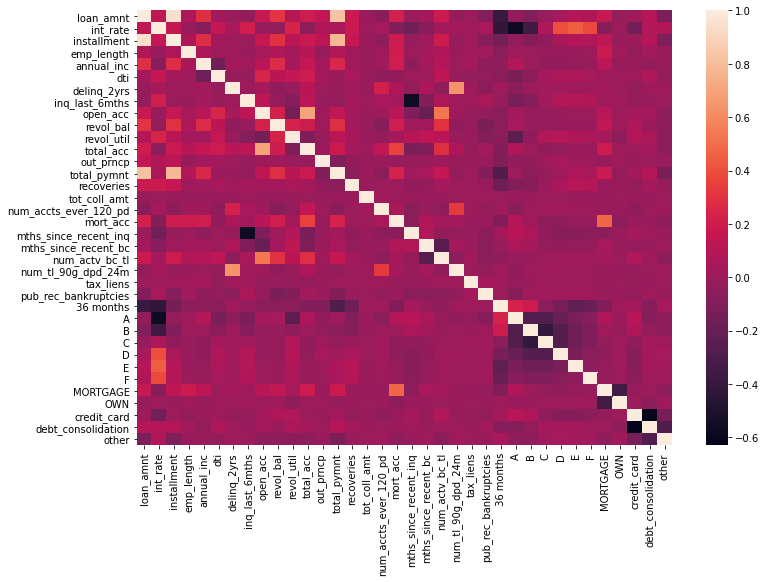

In [92]:
#coorelation metricx in graph
sns.heatmap(Correlation_Variables) # Heat Map

<AxesSubplot:>

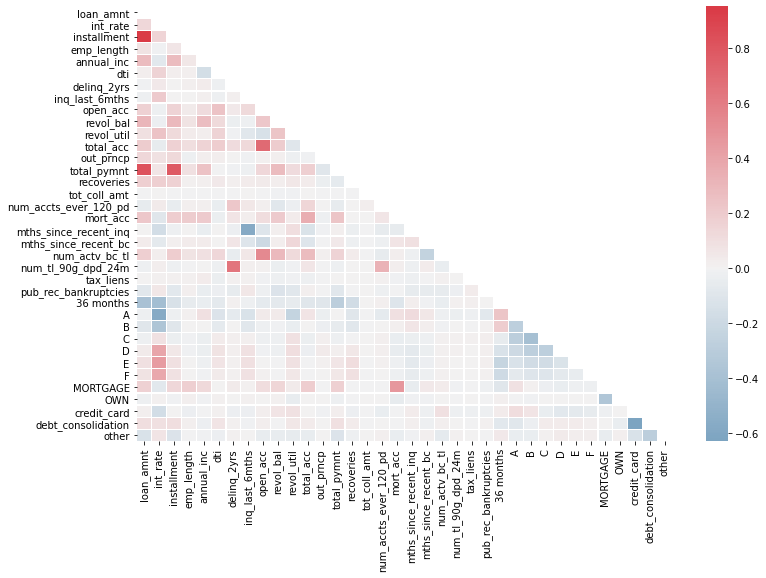

In [93]:
# Removing Top Right Triangle
mask = np.zeros_like(Correlation_Variables, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(Correlation_Variables, mask=mask, linewidths=.15, cmap=cmap, center=0)

In [94]:
Independent_Variable.corrwith(Target_Variable, axis = 0)
#correlation with target variable

loan_amnt               -0.083579
int_rate                -0.264876
installment             -0.068113
emp_length               0.023299
annual_inc               0.033037
dti                     -0.090609
delinq_2yrs             -0.019515
inq_last_6mths          -0.050331
open_acc                -0.023575
revol_bal                0.021105
revol_util              -0.052867
total_acc                0.023010
out_prncp               -0.269873
total_pymnt              0.334172
recoveries              -0.468261
tot_coll_amt             0.000611
num_accts_ever_120_pd   -0.012991
mort_acc                 0.085564
mths_since_recent_inq    0.053811
mths_since_recent_bc     0.045183
num_actv_bc_tl          -0.040855
num_tl_90g_dpd_24m      -0.009125
tax_liens               -0.008686
pub_rec_bankruptcies    -0.020686
 36 months               0.186137
A                        0.162123
B                        0.111551
C                       -0.039761
D                       -0.112915
E             

In [95]:
#drop variable which is highly correlated 
Independent_Variable.drop(columns = ['loan_amnt','open_acc','installment'], inplace = True)

In [96]:
cor = Independent_Variable.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.50) | (cor < -0.50)]

mths_since_recent_inq  inq_last_6mths   -0.568839
num_tl_90g_dpd_24m     delinq_2yrs       0.641621
A                      int_rate         -0.578182
debt_consolidation     credit_card      -0.629324
dtype: float64

# Training and Test Data Split

In [97]:
#import required libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
import warnings

import itertools

from imblearn.over_sampling import SMOTE

In [98]:
#split dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(Independent_Variable, Target_Variable, test_size=0.2, random_state=15)

In [99]:
#print train & test data shape 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(877619, 33) (877619,)
(219405, 33) (219405,)


# Undersampling

In [109]:
# describes info about train and test set 
print("Number of X_train data: ", X_train.shape) 
print("Number of y_train data: ", y_train.shape) 
print("Number of X_test data: ", X_test.shape) 
print("Number of y_test data: ", y_test.shape) 

Number of X_train data:  (877619, 33)
Number of y_train data:  (877619,)
Number of X_test data:  (219405, 33)
Number of y_test data:  (219405,)


In [110]:
#print before undersampling data 
print("Before OverSampling or UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling or UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling or UnderSampling, counts of label '1': 681677
Before OverSampling or UnderSampling, counts of label '0': 195942 



In [111]:
#import required libraries
from imblearn.under_sampling import RandomUnderSampler

In [112]:
#undersampling
rus = RandomUnderSampler(random_state= 42)
X_train_Undersample, y_train_Undersample = rus.fit_sample(X_train, y_train)

In [113]:
#print data set after undersampling 
print('After UnderSampling of data, the shape of train_X: {}'.format(X_train_Undersample.shape)) 
print('After UnderSampling of data, the shape of train_y: {} \n'.format(y_train_Undersample.shape)) 
  
print("After UnderSampling of data, counts of label '1': {}".format(sum(y_train_Undersample == 1))) 
print("After UnderSampling of data, counts of label '0': {}".format(sum(y_train_Undersample == 0))) 

After UnderSampling of data, the shape of train_X: (391884, 33)
After UnderSampling of data, the shape of train_y: (391884,) 

After UnderSampling of data, counts of label '1': 195942
After UnderSampling of data, counts of label '0': 195942


# Evaluation Metrics

In [115]:
#Import Required Libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB

In [116]:
#Confusion Matrics
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [118]:
#Import Required Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Import Required Libraries
from numpy import mean
from numpy import std
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Classification Models

# Decision Tree

In [119]:
clf_tree = DecisionTreeClassifier()

In [120]:
clf_tree.fit(X_train_Undersample, y_train_Undersample)

DecisionTreeClassifier()

In [121]:
y_pred_tree = clf_tree.predict_proba(X_test)[:,1]

In [122]:
print(classification_report(y_test, y_pred_tree)) 

              precision    recall  f1-score   support

           0       0.68      0.89      0.77     48781
           1       0.96      0.88      0.92    170624

    accuracy                           0.88    219405
   macro avg       0.82      0.88      0.84    219405
weighted avg       0.90      0.88      0.89    219405



Confusion matrix, without normalization
[[ 43293   5488]
 [ 20609 150015]]


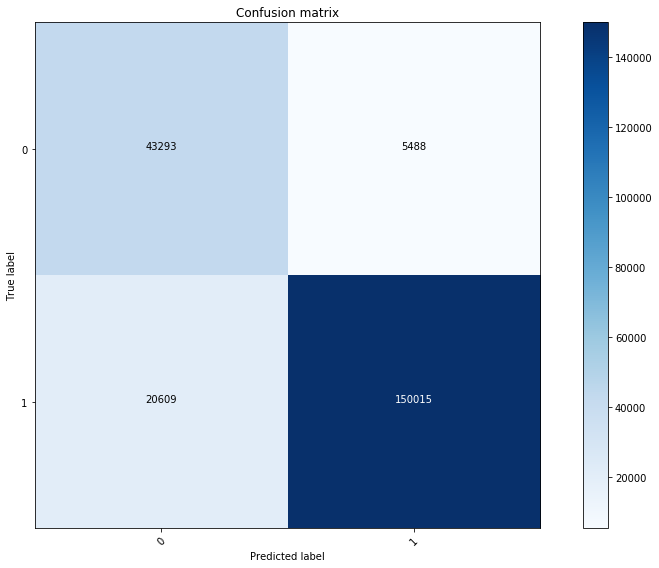

In [123]:
cnf_matrix = confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [124]:
# Creating true and false positive rates
false_positive_rate_tree, true_positive_rate_tree, threshold_tree = roc_curve(y_test, y_pred_tree)

In [125]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_tree))

roc_auc_score for DecisionTree:  0.8833555626953121


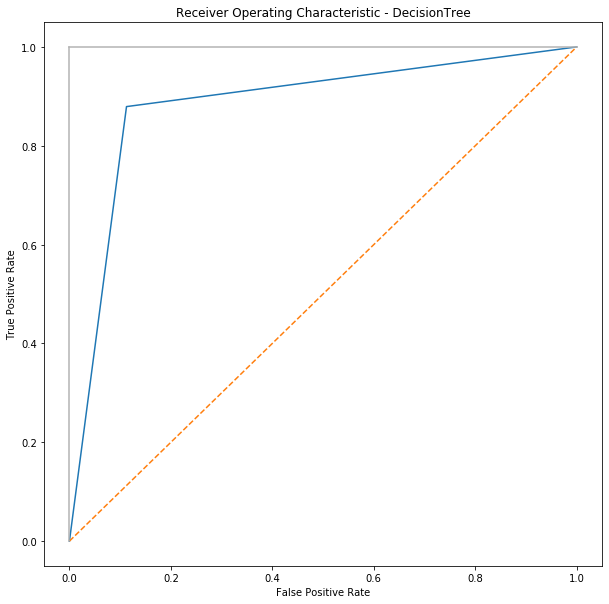

In [126]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate_tree, true_positive_rate_tree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
scores = cross_val_score(clf_tree, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.884 (0.002)


# Logistic Regression

In [128]:
clf_reg = LogisticRegression()

In [129]:
clf_reg.fit(X_train_Undersample, y_train_Undersample)

C:\Users\Nazmus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [130]:
y_pred_reg = clf_reg.predict_proba(X_test)[:,1]

In [131]:
print(classification_report(y_test, y_pred_reg.round())) 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     48781
           1       0.96      0.96      0.96    170624

    accuracy                           0.94    219405
   macro avg       0.91      0.91      0.91    219405
weighted avg       0.94      0.94      0.94    219405



Confusion matrix, without normalization
[[ 42085   6696]
 [  7250 163374]]


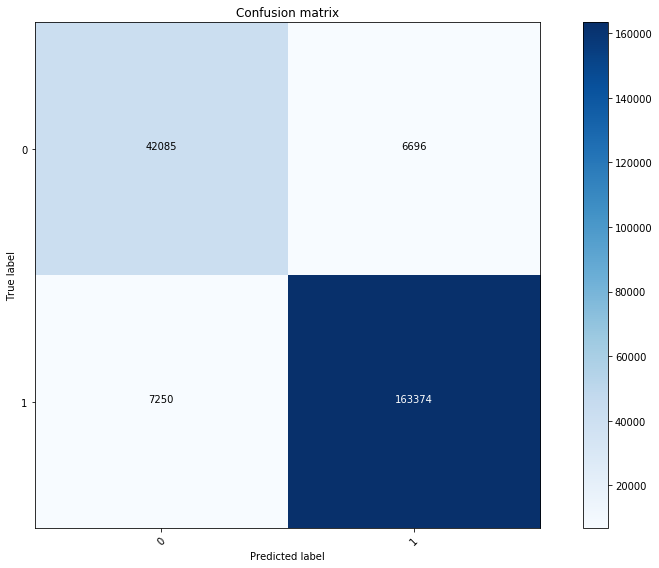

In [132]:
cnf_matrix = confusion_matrix(y_test, y_pred_reg.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [133]:
# Creating true and false positive rates
false_positive_rate_reg, true_positive_rate_reg, threshold_reg = roc_curve(y_test, y_pred_reg)

In [134]:
print('roc_auc_score for LogisticRegression: ', roc_auc_score(y_test, y_pred_reg))

roc_auc_score for LogisticRegression:  0.9633814469391292


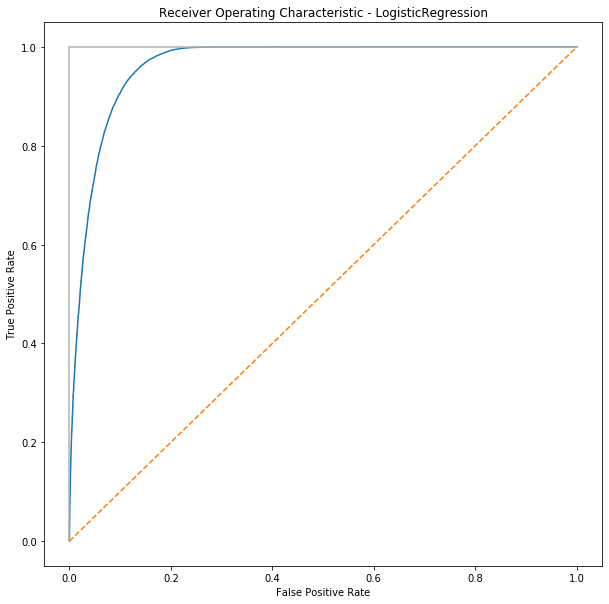

In [135]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(false_positive_rate_reg, true_positive_rate_reg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [136]:
scores = cross_val_score(clf_reg, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.910 (0.001)


# Naive Bayes

In [137]:
clf_NB = GaussianNB()

In [138]:
clf_NB.fit(X_train_Undersample, y_train_Undersample)

GaussianNB()

In [139]:
y_pred_NB = clf_NB.predict_proba(X_test)[:,1]

In [140]:
print(classification_report(y_test, y_pred_NB.round())) 

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     48781
           1       0.93      0.99      0.96    170624

    accuracy                           0.93    219405
   macro avg       0.94      0.86      0.89    219405
weighted avg       0.93      0.93      0.93    219405



Confusion matrix, without normalization
[[ 35689  13092]
 [  1878 168746]]


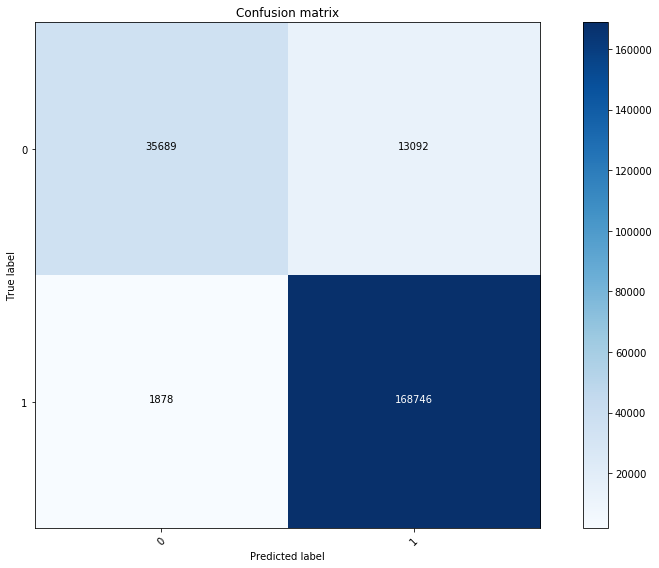

In [141]:
cnf_matrix = confusion_matrix(y_test, y_pred_NB.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [142]:
# Creating true and false positive rates
false_positive_rate_NB, true_positive_rate_NB, threshold_NB = roc_curve(y_test, y_pred_NB)

In [143]:
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_pred_NB))

roc_auc_score for Naive Bayes:  0.930880631830471


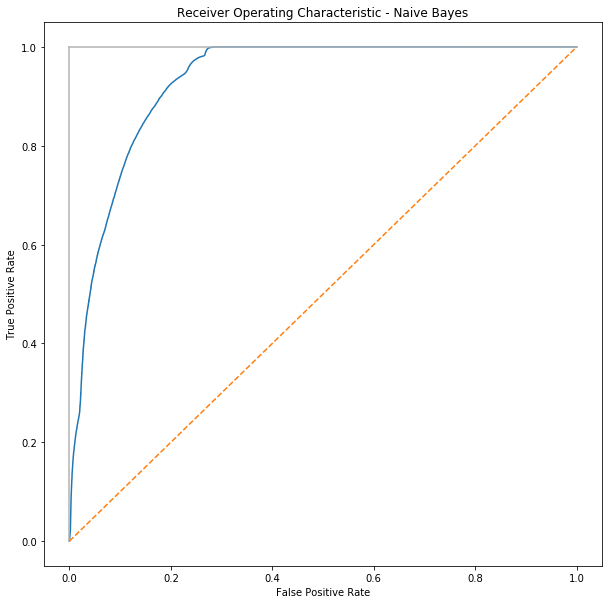

In [144]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate_NB, true_positive_rate_NB)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [145]:
scores = cross_val_score(clf_NB, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.861 (0.002)


# RandomForestClassifier

In [146]:
clf_rf = RandomForestClassifier()

In [147]:
clf_rf.fit(X_train_Undersample, y_train_Undersample)

RandomForestClassifier()

In [148]:
y_pred_rf = clf_rf.predict_proba(X_test)[:,1]

In [149]:
print(classification_report(y_test, y_pred_rf.round())) 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     48781
           1       0.97      0.97      0.97    170624

    accuracy                           0.95    219405
   macro avg       0.93      0.92      0.93    219405
weighted avg       0.95      0.95      0.95    219405



Confusion matrix, without normalization
[[ 42863   5918]
 [  5281 165343]]


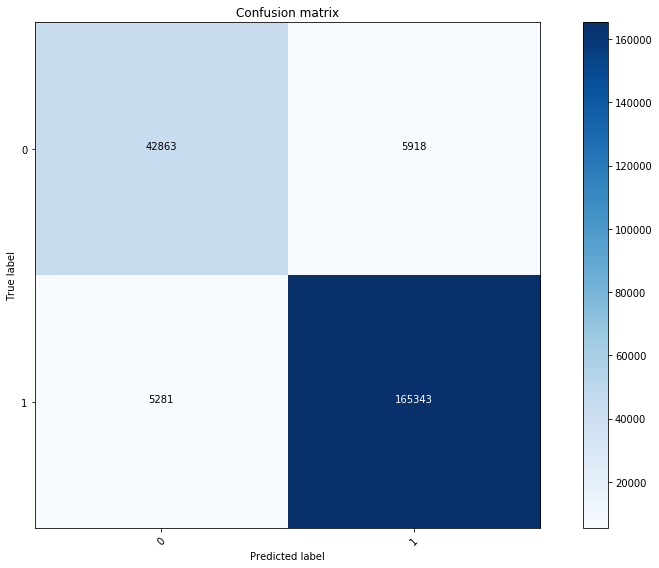

In [150]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [151]:
# Creating true and false positive rates
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, y_pred_rf)

In [152]:
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_pred_rf))

roc_auc_score for RandomForestClassifier:  0.9691758371805288


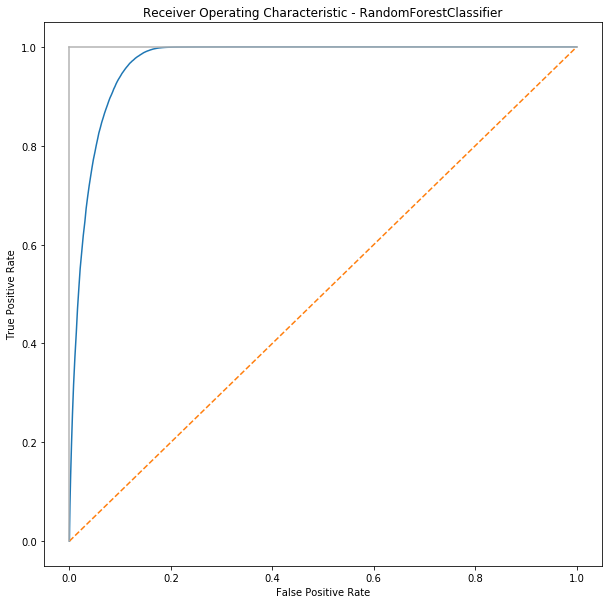

In [153]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [154]:
scores = cross_val_score(clf_rf, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.924 (0.002)


# Support Vector Machine

In [155]:
#Determining the number of dimensions to preserve given level of variance
#---------------------------------------------------------------------------------------------------------------------------
def find_min_pca(X_train, percentage=0.8):
    
    from sklearn.decomposition import PCA
    
    
    inital_components=pd.DataFrame(X_train).shape[1]
    if inital_components<10:
        print('The Data has less than 10 components, no PCA needed')
    else:
        a=int(str(inital_components)[-1])
        tens=int((inital_components-a)/10)
        for i in range(1,tens+1):
        
            
            
            pca = PCA(n_components=(i)*10)
            principalComponents = pca.fit_transform(X_train)
            explained_var= np.sum(pca.explained_variance_ratio_)
        
            
            
            if explained_var>=percentage:
                upper=i
                break
        
        

        for j in range((upper-1)*10,(upper)*10):
            pca = PCA(n_components=j)
            principalComponents = pca.fit_transform(X_train)                
            explained_var1= np.sum(pca.explained_variance_ratio_)
            if explained_var1>percentage:
                comp=j
                break
                    
                        
            
            
    return  comp

In [156]:
#Finding the number of Principal Components to use to preserver 90% of variance 
#---------------------------------------------------------------------------------
Min_Comps=find_min_pca(X_train_Undersample,0.9)
Min_Comps

19

In [157]:
#Verifying we are keeping the desired variance
#----------------------------------------------------------------------------------------------------------
pca = PCA(n_components=Min_Comps)
principalComponents = pca.fit_transform(X_train_Undersample)
print(np.sum(pca.explained_variance_ratio_))

0.9074462788085453


In [158]:
SVC=Pipeline([('pca', PCA(n_components=Min_Comps)),('clf', svm.SVC(random_state=123))])
SVC.fit(X_train_Undersample, y_train_Undersample)

Pipeline(steps=[('pca', PCA(n_components=19)), ('clf', SVC(random_state=123))])

In [159]:
y_pred_SVC=SVC.predict(X_test)

In [160]:
print(classification_report(y_test, y_pred_SVC.round())) 

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     48781
           1       0.96      0.96      0.96    170624

    accuracy                           0.93    219405
   macro avg       0.91      0.90      0.90    219405
weighted avg       0.93      0.93      0.93    219405



Confusion matrix, without normalization
[[ 41224   7557]
 [  6917 163707]]


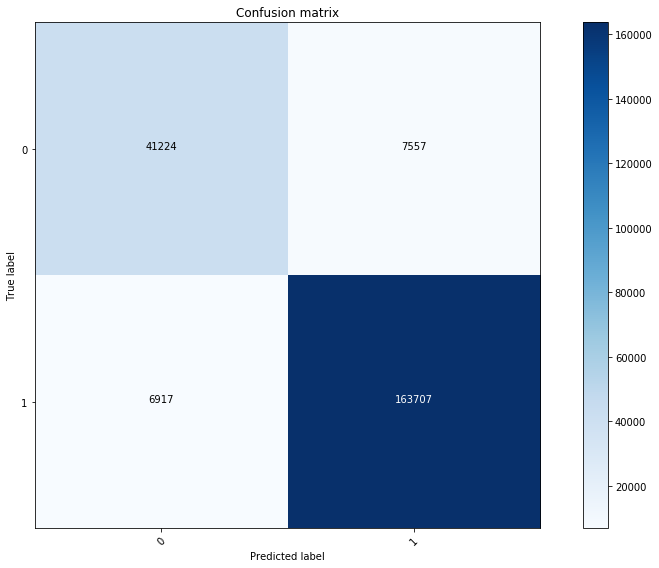

In [161]:
cnf_matrix = confusion_matrix(y_test, y_pred_SVC.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [162]:
# Creating true and false positive rates
false_positive_rate_SVC, true_positive_rate_SVC, threshold_SVC = roc_curve(y_test, y_pred_SVC)

In [163]:
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_pred_SVC))

roc_auc_score for RandomForestClassifier:  0.9022718474471186


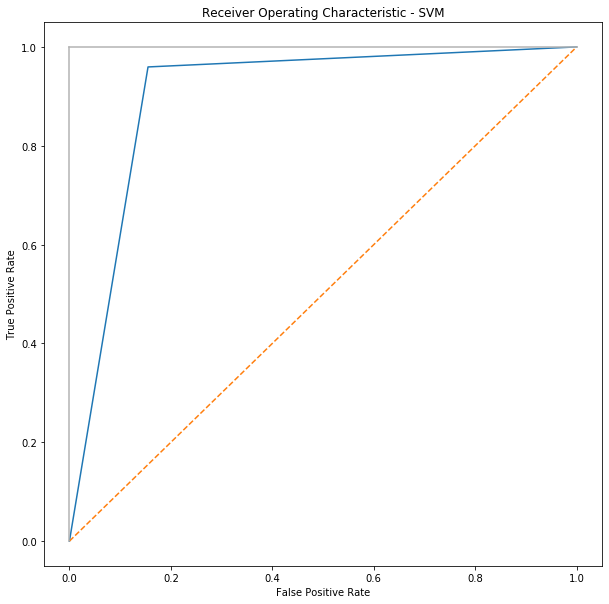

In [164]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate_SVC, true_positive_rate_SVC)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [165]:
scores = cross_val_score(SVC, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.903 (0.001)
